# IRIS dataset  classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

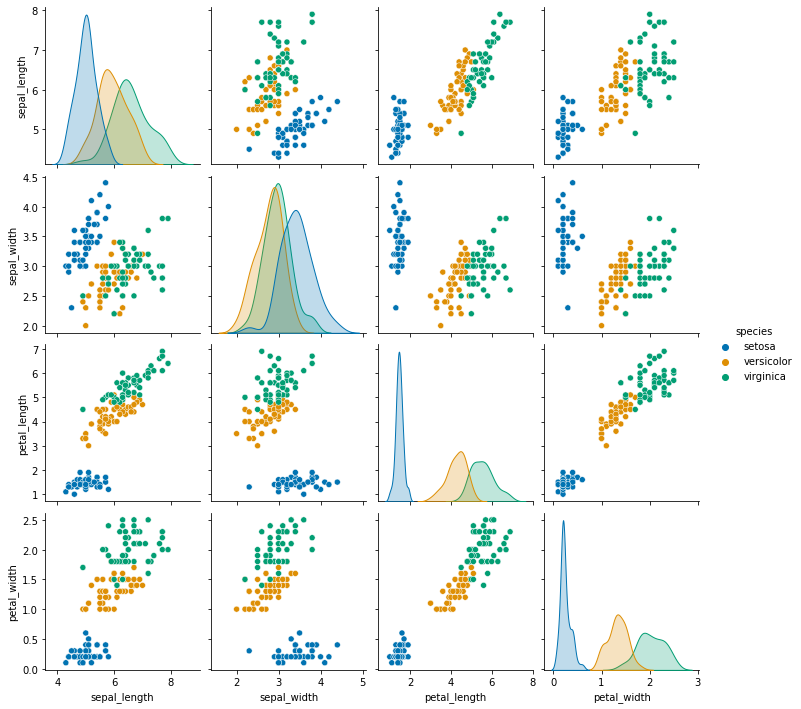

In [6]:
sns.pairplot(df, hue='species', palette='colorblind', kind='scatter')
plt.show()

From the above plot we can see how features are related to each other
1. When we see that 'setosa' species data points are totally different from the other two species.
2. In case of 'versicolor ' and 'virginica' the separation is much harder as the data points are overlapped.

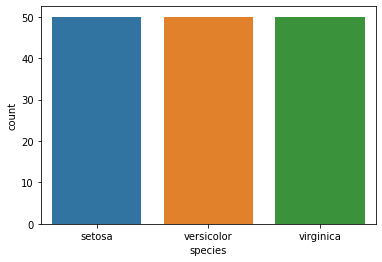

In [7]:
sns.countplot(x='species', data=df)
plt.show()

The dataset is balanced.

<AxesSubplot:>

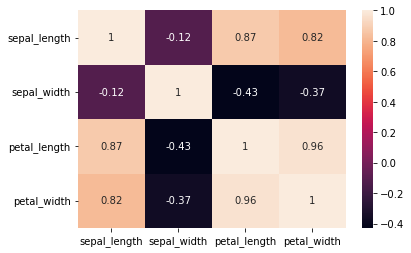

In [10]:
sns.heatmap(df.corr(), annot=True)

From the above heatmap we can see that petal_length and petal_width are highly correlated from which we can classify the species more easily.

In [11]:
X = df.drop("species" ,axis=1)
y = df["species"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
accuracy_score(y_test, y_pred)

1.0

In [20]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr =LogisticRegression()

In [24]:
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_predict = lr.predict(X_test)

In [26]:
score = lr.score(X_test, y_test)
score

1.0

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [30]:
data = {'sepal_length':5.0, 'sepal_width':3.4, 'petal_length':1.4, 'petal_width':0.2}
index = [0]
new_df = pd.DataFrame(data, index)

In [31]:
new_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.4,1.4,0.2


In [32]:
value_pred = lr.predict(new_df)
value_pred

array(['setosa'], dtype=object)

In [33]:
new_value_pred = knn_model.predict(new_df)
new_value_pred

array(['setosa'], dtype=object)